In [73]:
#!/usr/bin/env python
# coding: utf-8
# In[14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
std = "img/output/"
stdin = "img/input/"
micom = "micomgirl"
marimo = "marimo"
white_str = "board (1)"
white_lef = "board (2)"
white_rig = "board (3)"


now = white_str
img,gray,rgba=0,0,0

def setup(string):
    string+=".png"
    global img 
    img = cv2.imread(stdin+string)
    global gray 
    gray = cv2.imread(stdin+string,0)
    global rgba 
    rgba =  cv2.imread(stdin+string,-1)


setup(now)
#cv2.imwrite(stdin+now+".png",img)
now+=".jpg"

In [3]:
# In[12]
cv2.imwrite(std+"g"+now,gray)#gray

True

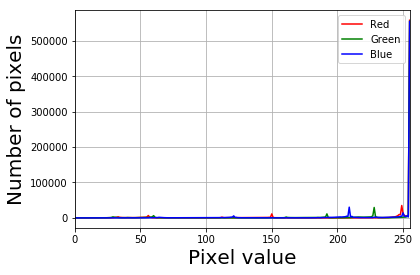

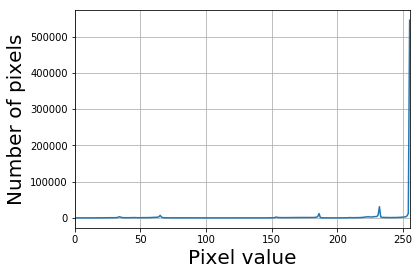

In [4]:
# In[17]:
"""
###ヒストグラム・濃度変換
-------------
ヒストグラム
このヒストグラムは
縦軸：画素数
横軸：画素数(階調値)
つまり、「画像中に画素値が〇〇の画素は何個あるのか」を示します。

形状 　	画像の状態
山が左寄り	暗い画像
山が右寄り	明るい画像
山が中央寄り	コントラストが低い

-------------
"""

def orihistplot():
    b,g,r = img[:,:,0], img[:,:,1], img[:,:,2]
    #RGB
    hist_r = cv2.calcHist([img],[2],None,[256],[0,256])
    hist_g = cv2.calcHist([img],[1],None,[256],[0,256])
    hist_b = cv2.calcHist([img],[0],None,[256],[0,256])
    #Gray
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    plt.xlim(0, 255)
    plt.plot(hist_r, "-r", label="Red")
    plt.plot(hist_g, "-g", label="Green")
    plt.plot(hist_b, "-b", label="Blue")
    plt.xlabel("Pixel value", fontsize=20)
    plt.ylabel("Number of pixels", fontsize=20)
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.xlim(0, 255)
    plt.plot(hist)
    plt.xlabel("Pixel value", fontsize=20)
    plt.ylabel("Number of pixels", fontsize=20)
    plt.grid()
    plt.show()
    
orihistplot()

In [5]:
# In[21]:


"""
ガンマ補正
画像のコントラストを調節し、視認しやすくするのによく使われる

url<https://algorithm.joho.info/image-processing/gamma-correction/>
"""
gamma = 1.0

# 画素値の最大値
imax = gray.max() 
    
# ガンマ補正
gray2 = imax * (gray / imax)**(1/gamma)

# 結果の出力
cv2.imwrite(std+"gamm"+now, gray2)

True

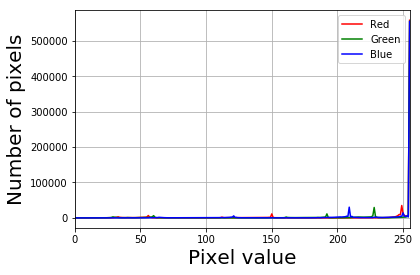

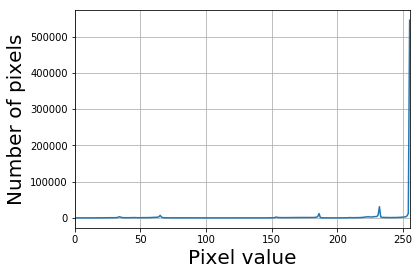

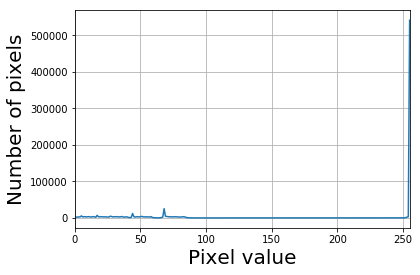

In [6]:

# In[27]:
"""
ヒストグラム平均化
画素数を縦軸に取り輝度値を横軸に取るそのグラフを平たんにすることで見やすくする。
"""
def equalize_hist(src):
   # 画像の高さ・幅を取得
   h, w = src.shape[0], src.shape[1]
   
   # 全画素数
   s = w * h
   
   # 画素値の最大値
   imax = src.max()
   
   # ヒストグラムの算出
   hist, bins = np.histogram(src.ravel(),256,[0,256])

   # 出力画像用の配列（要素は全て0）
   dst = np.empty((h,w))

   for y in range(0, h):
    for x in range(0, w):
           # ヒストグラム平均化の計算式
           dst[y][x] = np.sum(hist[0: src[y][x]]) * (imax / s)

    return dst



gray2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# 方法2(OpenCVで実装)
dst2 = cv2.equalizeHist(gray2)
# 結果の出力
cv2.imwrite(std+"Hist"+now, dst2)
def avehistplot():
    #ヒストグラム
    eqHgray = cv2.imread(std+"Hist"+now,0)

    #Gray
    hist, bins = np.histogram(eqHgray.ravel(),256,[0,256])

    plt.xlim(0, 255)
    plt.plot(hist)
    plt.xlabel("Pixel value", fontsize=20)
    plt.ylabel("Number of pixels", fontsize=20)
    plt.grid()
    plt.show()
    
orihistplot()
avehistplot()

In [7]:
"""
k-means法
適当に3点を決めてその周辺の点を3つにグループ分けする。その後グループごとに重心を決めて新しい中心とする
"""
def sub_color(src, K):

    # 次元数を1落とす
    Z = src.reshape((-1,3))

    # float32型に変換
    Z = np.float32(Z)

    # 基準の定義
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    # K-means法で減色
    ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # UINT8に変換
    center = np.uint8(center)

    res = center[label.flatten()]

    # 配列の次元数と入力画像と同じに戻す
    return res.reshape((src.shape))

# 減色処理(三値化)
dst = sub_color(img, K=3)
    
# 結果を出力
cv2.imwrite(std+"k-means"+now, dst)

True

In [8]:
###フィルタ
"""
平均化
ある周辺8近傍の画素値を平均化して新しい画素値としている
画像のノイズを消すことができる（ココでのノイズとは「夜に星をとったときの荒い感じ」「」）
"""

dst3 = cv2.blur(gray,ksize=(3,3))
cv2.imwrite(std+"ave"+now,dst3)

True

In [9]:
"""
ガウシアンフィルタ
ガウス分布を用いて画像の平滑化する。
ksizeは奇数である
ぼかし度はksizeとsigmaの値で変化する。
ksize = 近傍のとる大きさ
sigmaX = 中心の重み
"""
dst3 = cv2.GaussianBlur(gray,ksize=(3,3),sigmaX=1.3)
cv2.imwrite(std+"gauss"+now,dst3)

True

In [10]:
"""
メディアンフィルタ
中央値を利用してぼかす
ksizeは奇数
ぼかし度はksizeの大きさで決まる
"""
dst3 = cv2.medianBlur(gray,ksize=3)
cv2.imwrite(std+"median"+now,dst3)

True

In [11]:
"""
1次微分フィルタ
今回は垂直方向の変化をみる。
白から黒に変わったところの変化が大きいところを出力しedgeを出す。
画素値の変化をとらえる。
"""
diff = 10
kernel = np.array([[0,0,0],[-diff,0,diff],[0,0,0]])
dst3 = cv2.filter2D(gray,cv2.CV_64F,kernel)
cv2.imwrite(std+"diff"+now,dst3)

True

In [12]:
"""
prewitt
1次微分フィルタにぼかしを加えたもの
要は改良版
"""
# カーネル（縦方向の輪郭検出用）
kernel = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
# 方法2       
dst2 = cv2.filter2D(gray, cv2.CV_64F, kernel)
# 結果を出力
cv2.imwrite(std+"prewitt"+now, dst2)


True

In [13]:
"""
sobel
prewittの改良版平滑化フィルタの前にガウスみたいなのをかける
（注目画素との距離に応じて重み付けを変化させた）
"""
# 方法3
dst3 = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3)
    
# 結果を出力
cv2.imwrite(std+"sobel"+now, dst3)

True

In [14]:
"""
laplacian
水平と垂直に対して2次微分を行い、近傍の値を計算する
これには4近傍とるものと8近傍とるものがある
"""
# 方法3
dst3 = cv2.Laplacian(gray, cv2.CV_32F, ksize=5)
    
# 結果を出力
cv2.imwrite(std+"laplacian"+now, dst3)

True

In [15]:
"""
emboss
輪郭部分を浮き出させるフィルタ。
"""
# カーネル（オペレータ）
kernel = np.array([[-2, -1, 0],[-1, 1, 1],[-1, 1, 2]])

# オフセット値
offset = 128
     
# 方法2       
dst2 = cv2.filter2D(gray, -1, kernel, delta=offset)
    
# 結果を出力
cv2.imwrite(std+"emboss"+now, dst2)

True

In [60]:
"""
canny
輪郭の検出漏れや誤検出が少ない。
②各点に一本の輪郭を検出する。
③真にエッジの部分を検出できる。
流れ
①ガウシアンフィルタで平滑化処理
↓
②平滑化画像を微分
↓
③微分画像から勾配の大きさ・方向の計算
↓
④Non maximum Suppression処理
↓
⑤Hysteresis Threshold処理
Cannyの第1引数と第2引数は信頼性の低い輪郭、信頼性の高い輪郭と呼ばれている。
以下のようである。
最小閾値より小さい	信頼性の低い輪郭。
最小閾値～最大閾値の間	信頼性の高い輪郭が隣にあれば信頼性の高い輪郭。違えば信頼性の低い輪郭。
最大閾値より大きい	信頼性の高い輪郭。
となっている
"""
# 方法2(OpenCVで実装)
edge2 = cv2.Canny(gray, 100, 200)

# 結果を出力
cv2.imwrite(std+"canny"+now, edge2)

True

In [56]:
"""
2値化
"""
# 閾値
t = 127
# 方法2 （OpenCVで実装）      
ret, th2 = cv2.threshold(gray, t, 255, cv2.THRESH_BINARY)    

# 結果を出力
cv2.imwrite(std+"th2"+now, th2)

True

In [57]:
"""
2値化＋canny
あんまり効果ない？？
"""
# 閾値
t = 127
# 方法2 （OpenCVで実装）      
ret, th2 = cv2.threshold(edge2, t, 255, cv2.THRESH_BINARY)    

# 結果を出力
cv2.imwrite(std+"th2&canny"+now, th2)

True

In [61]:
"""
白黒反転
"""

rcanny = cv2.bitwise_not(edge2)
# 結果を出力
cv2.imwrite(std+"rcanny"+now, rcanny)

True

In [76]:
# 閾値
t = 127
# 方法2 （OpenCVで実装）      
ret, th2 = cv2.threshold(edge2, t, 255, cv2.THRESH_BINARY)    

# 輪郭抽出
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img2 = img
# 面積の大きいもののみ選別
areas = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 10000:
        epsilon = 0.1*cv2.arcLength(cnt,True)
        approx = cv2.approxPolyDP(cnt,epsilon,True)
        areas.append(approx)
# 結果を出力
cv2.imwrite(std+"rededge"+now, img2)

pts1 = np.float32(areas[0])
pts2 = np.float32([[600,300],[600,0],[0,0],[0,300]])

#dst = cv2.warpPerspective(img2,cv2.getPerspectiveTransform(pts1,pts2),(600,300))

# 結果を出力
#cv2.imwrite(std+"changed"+now, dst)

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgproc\src\imgwarp.cpp:3157: error: (-215:Assertion failed) src.checkVector(2, CV_32F) == 4 && dst.checkVector(2, CV_32F) == 4 in function 'cv::getPerspectiveTransform'
